In [1]:
import time
from timeit import default_timer as timer
import numpy as np
from functools import wraps
import cProfile
import subprocess
NAME = "Carlotta"

# Task 1.1
Clock granularity is the smallest measurable time difference that the system’s timer can distinguish. It depends on the underlying hardware and the precision of the software timer being used. Granularity impacts the accuracy of performance measurements and time-sensitive operations in applications.
## Comparison of timers: 
time.time() and time.time_ns() have comparable granularities (approximately 715-768 ns), suggesting they rely on the same underlying system clock. timeit, designed for high-precision benchmarking, shows a finer granularity of around 125 ns, indicating that it may use a more precise timer. We conclude that if we use time.time() or time.time_ns() for profiling, operations taking less than 768 ns may not be reliably measured. Only for general-purpose timekeeping or measuring events that span milliseconds or more, time.time() or time.time_ns() are adequate.

In [2]:
def checktick_0():
    """
    time.time(): precision is approximately ± 1 microsecond
    """
    M = 200
    timesfound = np.empty((M,))
    for i in range(M):
        t1 =  time.time() # get timestamp from timer
        t2 = time.time() # get timestamp from timer
        while (t2 - t1) < 1e-16: # if zero then we are below clock granularity, retake timing
            t2 = time.time() # get timestamp from timer
        t1 = t2 # this is outside the loop
        timesfound[i] = t1 # record the time stamp
    minDelta = 1000000
    Delta = np.diff(timesfound) # it should be cast to int only when needed
    minDelta = Delta.min()
    return minDelta

def checktick_1():
    """
    timeit: higher resolution, lower clock granularity
    """
    M = 200
    timesfound = np.empty((M,))
    for i in range(M):
        t1 =  timer() # get timestamp from timer
        t2 = timer() # get timestamp from timer
        while (t2 - t1) < 1e-16: # if zero then we are below clock granularity, retake timing
            t2 = timer() # get timestamp from timer
        t1 = t2 # this is outside the loop
        timesfound[i] = t1 # record the time stamp
    minDelta = 1000000
    Delta = np.diff(timesfound) # it should be cast to int only when needed
    minDelta = Delta.min()
    return minDelta

def checktick_2():
    """
    higher resolution in nanoseconds
    """
    M = 200
    timesfound = np.empty((M,))
    for i in range(M):
        t1 =  time.time_ns() # get timestamp from timer
        t2 = time.time_ns() # get timestamp from timer
        while (t2 - t1) < 1e-16: # if zero then we are below clock granularity, retake timing
            t2 = time.time_ns() # get timestamp from timer
        t1 = t2 # this is outside the loop
        timesfound[i] = t1 # record the time stamp
    minDelta = 1000000
    Delta = np.diff(timesfound) # it should be cast to int only when needed
    minDelta = Delta.min()
    return minDelta

In [3]:

print("----------Exercise 1: Profiling the Julia Set Code----------\n")
print("-------------------------Task 1.1-------------------------")
print("time.time() : ", checktick_0())
print("timeit : ", checktick_1())
print("time.time_ns() : ", checktick_2()/1000000000, "\n")

----------Exercise 1: Profiling the Julia Set Code----------

-------------------------Task 1.1-------------------------
time.time() :  7.152557373046875e-07
timeit :  3.3294782042503357e-07
time.time_ns() :  1.024e-06 



# Task 1.2 
The standard deviations are: $26.57 \text{ms}$ for calc_pure_python and $13.07 \text{ms}$ for calculate_z_serial_purepython. Both values are rather low, indicating that the execution times are consistent across runs.
The smallest measurable time difference for our system was approximately $125 \, \text{ns}$. The standard deviations are orders of magnitude larger than the clock granularity. This means that the variations in execution time are due to external system factors (e.g., CPU scheduling, background processes), not limitations of the timer resolution.

In [4]:
def timefn_1_2(fn):
  @wraps(fn)
  def measure_time(*args, **kwargs):
    times = np.zeros(3, dtype=float)
    for i in range(3):
      t1 = timer()
      result = fn(*args, **kwargs)
      t2 = timer()
      times[i] = t2-t1
    print(f"@timefn_1_2: {fn.__name__} took {np.average(times)} seconds on average, with standard deviation {np.std(times)}")
    return result
  return measure_time

In [5]:
from main import calc_pure_python, calculate_z_serial_purepython
print("-------------------------Task 1.2-------------------------")
print("Profiling calc_pure_python:")
test1 = timefn_1_2(calc_pure_python)
params2 = test1(desired_width=1000, max_iterations=300)
print("\n Profiling calculate_z_serial_purepython")
test2 = timefn_1_2(calculate_z_serial_purepython)
test2(300, params2[0], params2[1])
print("\n")
params_zfunc = params2


-------------------------Task 1.2-------------------------
Profiling calc_pure_python:
Length of x: 1000
Total elements: 1000000
calculate_z_serial_purepython took 2.702134132385254 seconds
Length of x: 1000
Total elements: 1000000
calculate_z_serial_purepython took 2.6919050216674805 seconds
Length of x: 1000
Total elements: 1000000
calculate_z_serial_purepython took 2.6382668018341064 seconds
@timefn_1_2: calc_pure_python took 2.8400817087385803 seconds on average, with standard deviation 0.03464154157728348

 Profiling calculate_z_serial_purepython
@timefn_1_2: calculate_z_serial_purepython took 2.6652092780762664 seconds on average, with standard deviation 0.029560878926095435




# Task 1.3 
Results of cProfile:  


In [ ]:
! python -m cProfile -s cumulative JuliaSet.py

Length of x: 1000
Total elements: 1000000
calculate_z_serial_purepython took 4.705276966094971 seconds
         36221997 function calls in 5.033 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    5.033    5.033 {built-in method builtins.exec}
        1    0.015    0.015    5.033    5.033 JuliaSet.py:1(<module>)
        1    0.261    0.261    5.019    5.019 JuliaSet.py:21(calc_pure_python)
        1    3.681    3.681    4.705    4.705 JuliaSet.py:59(calculate_z_serial_purepython)
 34219980    1.024    0.000    1.024    0.000 {built-in method builtins.abs}
  2002000    0.047    0.000    0.047    0.000 {method 'append' of 'list' objects}
        1    0.004    0.004    0.004    0.004 {built-in method builtins.sum}
        3    0.000    0.000    0.000    0.000 {built-in method builtins.print}
        1    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:1009(_handle_fromlist)
        4    0.000    0.000    0.000    0.000 {built-in method builtins.len}
        2    0.000    0.000    0.000    0.000 {built-in method time.time}
        1    0.000    0.000    0.000    0.000 {built-in method builtins.hasattr}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}

! python -m cProfile -o profile.stats JuliaSet.py

In [ ]:
! python -m snakeviz profile.stats --server

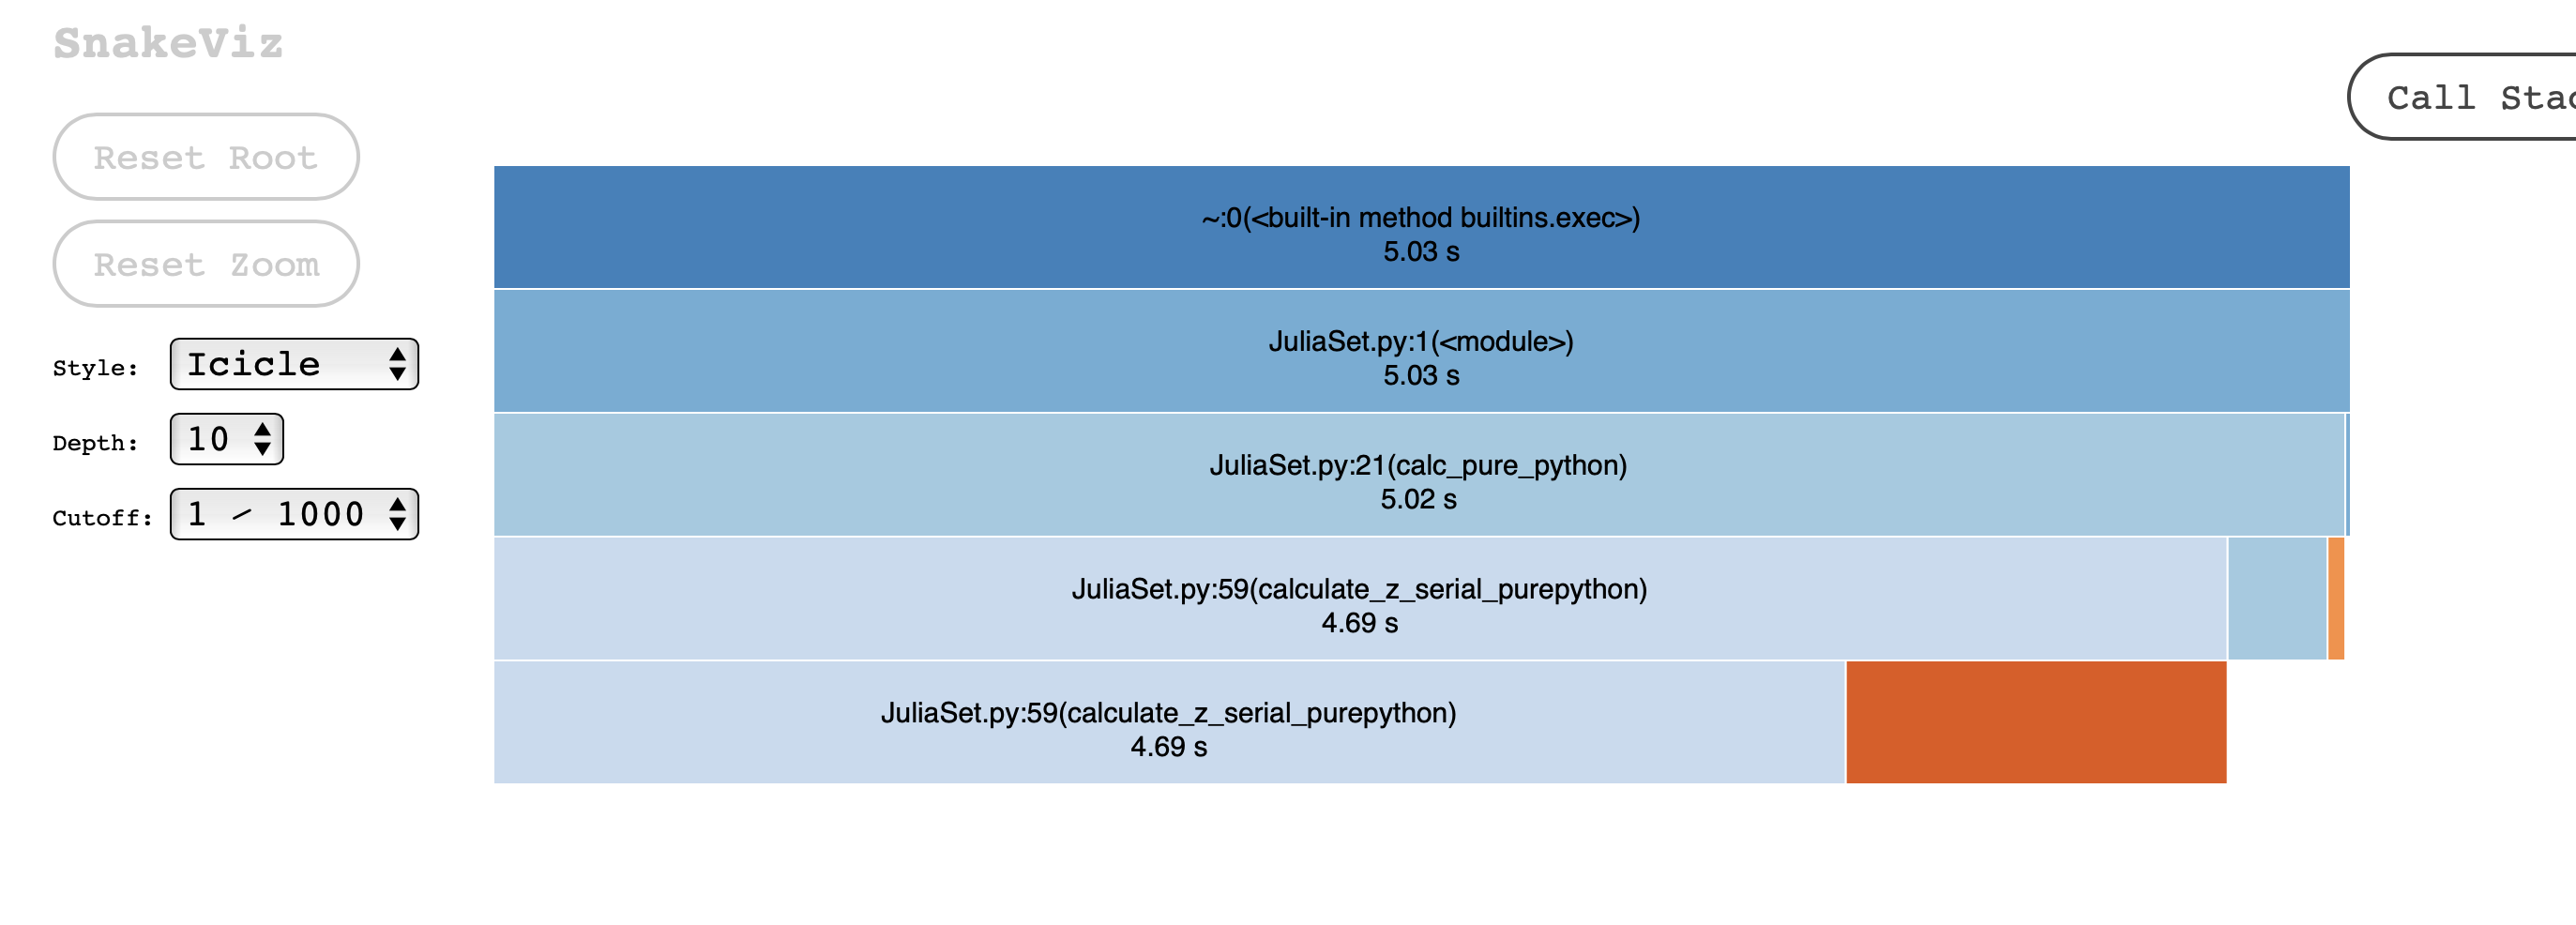

Result of line_profiler:

In [ ]:
## add @profile in the line above def calculate_z_serial_purepython(maxiter, zs, cs):
! python -m kernprof -l JuliaSet.py

calculate_z_serial_purepython took 27.055697202682495 seconds

This is about 5x longer than with cProfile 

In [ ]:
! python -m line_profiler -rmt "JuliaSet.py.lprof"


Timer unit: 1e-06 s

Total time: 14.61 s
File: JuliaSet.py
Function: calculate_z_serial_purepython at line 58

Line #      Hits         Time  Per Hit   % Time  Line Contents
==============================================================
    58                                           @profile
    59                                           def calculate_z_serial_purepython(maxiter, zs, cs):
    60                                               """Calculate output list using Julia update rule"""
    61         1        796.0    796.0      0.0      output = [0] * len(zs)
    62   1000001     136616.0      0.1      0.9      for i in range(len(zs)):
    63   1000000      91104.0      0.1      0.6          n = 0
    64   1000000     127426.0      0.1      0.9          z = zs[i]
    65   1000000      97462.0      0.1      0.7          c = cs[i]
    66  34219980    6382636.0      0.2     43.7          while abs(z) < 2 and n < maxiter:
    67  33219980    3919565.0      0.1     26.8              z = z * z + c
    68  33219980    3740306.0      0.1     25.6              n += 1
    69   1000000     114048.0      0.1      0.8          output[i] = n
    70         1          0.0      0.0      0.0      return output

 14.61 seconds - JuliaSet.py:58 - calculate_z_serial_purepython

Measure the overhead added by using cProfile and line_profiler: 
Overhead using cProfile: 4.705276966094971 s - 3.439000129699707 s = 1.2662768364 s
Overhead using line_profiler: 27.055697202682495 s - 3.439000129699707 s = 23.616697073 s

# Task 1.4 Memory-profile the Juliaset code
Report the memory profiling results from memory_profiler and mprof (including the plot)
Measure the overhead of memory_profiler and mprof.
We reduce the problem size to a 100 x 100 grid

In [ ]:
# add the @profile to calculate_z_serial_purepython()
! python -m memory_profiler JuliaSet.py

Line #    Mem usage    Increment  Occurrences   Line Contents
=============================================================
    58   43.938 MiB   43.938 MiB           1   @profile
    59                                         def calculate_z_serial_purepython(maxiter, zs, cs):
    60                                             """Calculate output list using Julia update rule"""
    61   43.938 MiB    0.000 MiB           1       output = [0] * len(zs)
    62   44.031 MiB    0.000 MiB       10001       for i in range(len(zs)):
    63   44.031 MiB    0.000 MiB       10000           n = 0
    64   44.031 MiB    0.000 MiB       10000           z = zs[i]
    65   44.031 MiB    0.000 MiB       10000           c = cs[i]
    66   44.031 MiB    0.000 MiB      344236           while abs(z) < 2 and n < maxiter:
    67   44.031 MiB    0.062 MiB      334236               z = z * z + c
    68   44.031 MiB    0.031 MiB      334236               n += 1
    69   44.031 MiB    0.000 MiB       10000           output[i] = n
    70   44.031 MiB    0.000 MiB           1       return output

In [ ]:
! python -m mprof run JuliaSet.py

In [ ]:
! python -m mprof plot mprofile_20250118152318.dat

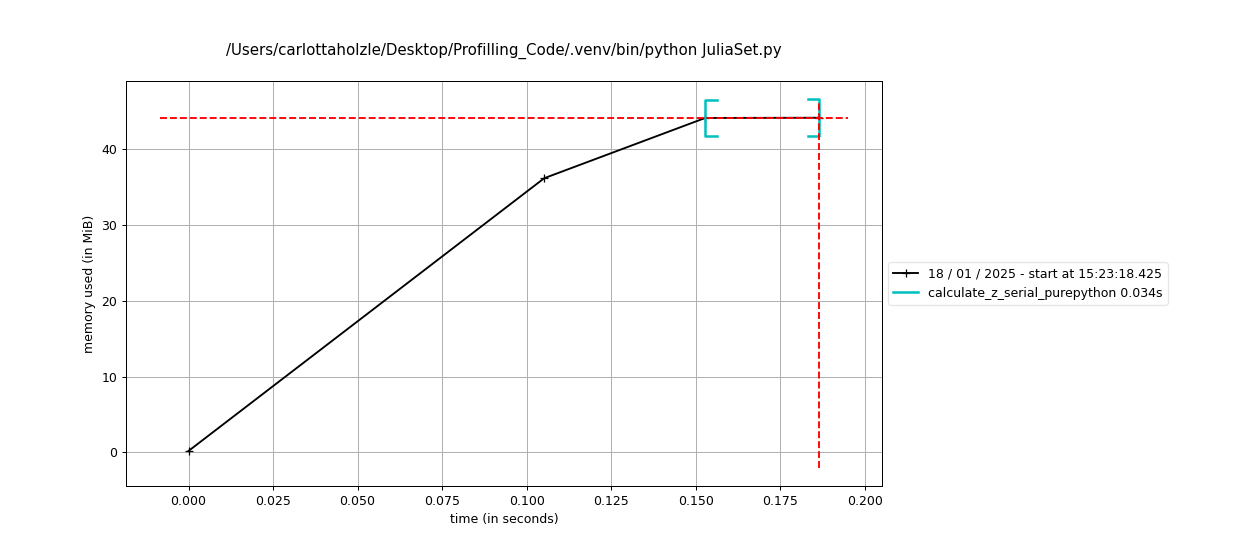

Overhead added through memory_profiler: 13.593201875686646s - 0.044191837310791016s = 13.5490100384 s -> extensive overhead added 
Overhead added through mproof: 0.033857107162475586s - 0.04529619216918945s = -0,01143908501s -> no overhead added

# Exercise 2 
1. cProfile & line_profiler
2. SnakeViz to visualize the profiling information from cProfile

In [2]:
! python -m cProfile -s cumulative DiffusionProcess.py

         9 function calls in 0.485 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.485    0.485 {built-in method builtins.exec}
        1    0.003    0.003    0.485    0.485 DiffusionProcess.py:1(<module>)
        1    0.012    0.012    0.482    0.482 DiffusionProcess.py:18(run_experiment)
        5    0.469    0.094    0.469    0.094 DiffusionProcess.py:3(evolve)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




In [3]:
! python -m cProfile -o profile_DiffusionProcess.stats DiffusionProcess.py

In [5]:

! python -m snakeviz profile_DiffusionProcess.stats --server

snakeviz web server started on 127.0.0.1:8080; enter Ctrl-C to exit
http://127.0.0.1:8080/snakeviz/%2FUsers%2Fcarlottaholzle%2FDesktop%2FProfilling_Code%2Fprofile_DiffusionProcess.stats
^C

Bye!


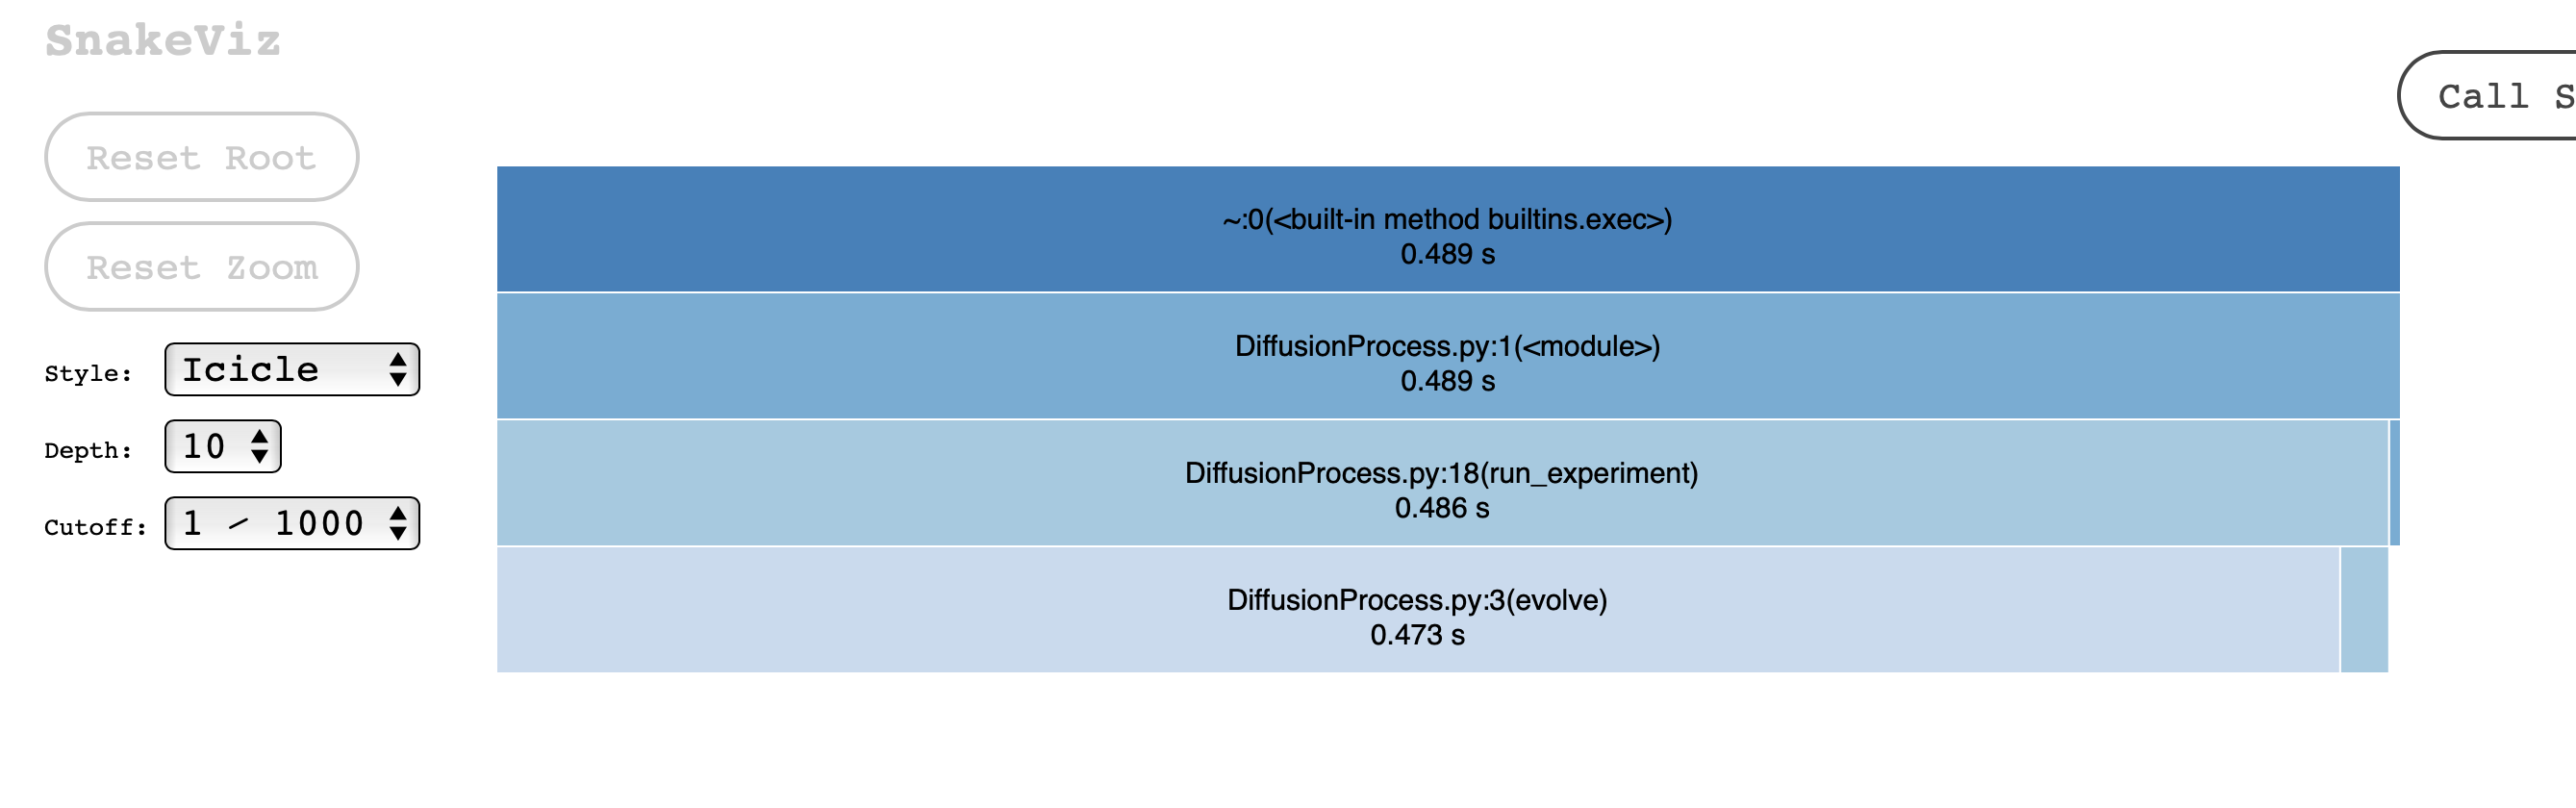

Result of line_profiler:

In [6]:
# add @profile to evolve method
! python -m kernprof -l DiffusionProcess.py

ERROR: Could not find a version that satisfies the requirement kernprof (from versions: none)
ERROR: No matching distribution found for kernprof
/opt/anaconda3/bin/python: No module named kernprof


In [ ]:
! python -m line_profiler -rmt "DiffusionProcess.py.lprof"

Timer unit: 1e-06 s

Total time: 1.77539 s
File: DiffusionProcess.py
Function: evolve at line 2

Line       Hits         Time  Per Hit   % Time  Line Contents
==============================================================
     2                                           @profile
     3                                           def evolve(grid, dt, D=1.0):
     4         5          7.0      1.4      0.0      xmax, ymax = grid_shape
     5         5       3010.0    602.0      0.2      new_grid = [[0.0] * ymax for x in range(xmax)]
     6      3205        412.0      0.1      0.0      for i in range(xmax):
     7   2051200     236515.0      0.1     13.3          for j in range(ymax):
     8                                                       grid_xx = (
     9   2048000     598763.0      0.3     33.7                  grid[(i + 1) % xmax][j] + grid[(i - 1) % xmax][j] - 2.0 * grid[i][j]
    10                                                       )
    11                                                       grid_yy = (
    12   2048000     553574.0      0.3     31.2                  grid[i][(j + 1) % ymax] + grid[i][(j - 1) % ymax] - 2.0 * grid[i][j]
    13                                                       )
    14   2048000     383108.0      0.2     21.6              new_grid[i][j] = grid[i][j] + D * (grid_xx + grid_yy) * dt
    15         5          3.0      0.6      0.0      return new_grid

# Task 2.2 Memory-profile the diffusion code.

In [ ]:
# add @profile to evolve method & make the grid_shape smaller -> (320,320) instead of (640, 640)
! python -m memory_profiler DiffusionProcess.py

Line #    Mem usage    Increment  Occurrences   Line Contents
=============================================================
     3   50.516 MiB   36.344 MiB           5   @profile
     4                                         def evolve(grid, dt, D=1.0):
     5   50.516 MiB    0.000 MiB           5       xmax, ymax = grid_shape
     6   50.516 MiB    2.328 MiB        1615       new_grid = [[0.0] * ymax for x in range(xmax)]
     7   52.766 MiB -999.922 MiB        1605       for i in range(xmax):
     8   52.766 MiB -321963.016 MiB      513600           for j in range(ymax):
     9                                                     grid_xx = (
    10   52.766 MiB -320970.969 MiB      512000                   grid[(i + 1) % xmax][j] + grid[(i - 1) % xmax][j] - 2.0 * grid[i][j]
    11                                                     )
    12                                                     grid_yy = (
    13   52.766 MiB -320970.969 MiB      512000                   grid[i][(j + 1) % ymax] + grid[i][(j - 1) % ymax] - 2.0 * grid[i][j]
    14                                                     )
    15   52.766 MiB -320970.969 MiB      512000               new_grid[i][j] = grid[i][j] + D * (grid_xx + grid_yy) * dt
    16   52.766 MiB    0.000 MiB           5       return new_grid

In [2]:
! python -m mprof run DiffusionProcess.py 

mprof.py: Sampling memory every 0.1s
running new process
running as a Python program...


In [ ]:
! python -m mprof plot mprofile_20250118172350.dat

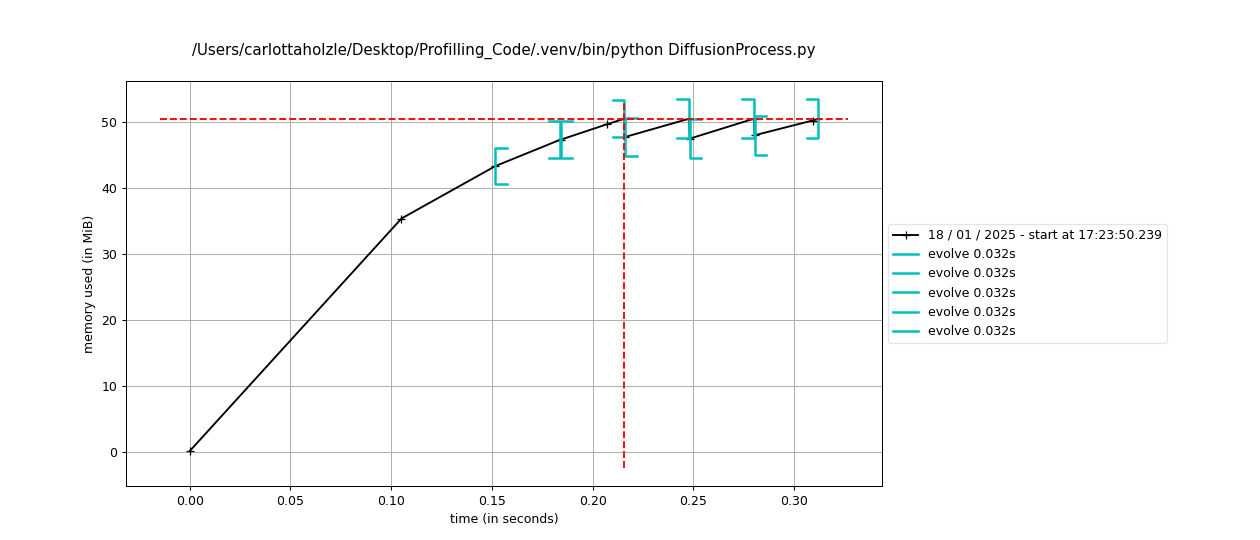

# Bonus task 
CPU usage percentage per core
final plot and summary table

In [ ]:
# CPU usage percentage per core: use the psutil.cpu_percent(interval=1, percpu=True) function.
# plot with the evolution of the CPU percentage for different cores and a table with recorded value


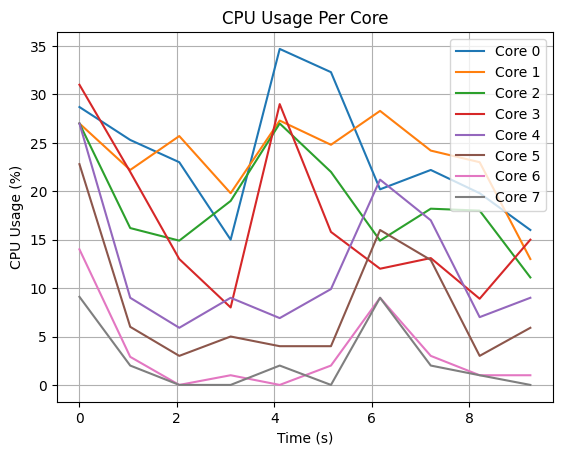

     Core  Average CPU Usage (%)
0  Core 0                  23.72
1  Core 1                  23.53
2  Core 2                  18.83
3  Core 3                  16.78
4  Core 4                  12.19
5  Core 5                   8.26
6  Core 6                   3.39
7  Core 7                   2.51


In [7]:
import psutil
import time
import matplotlib.pyplot as plt
import pandas as pd
from functools import wraps

# Tool for recording CPU usage
class CPUProfiler:
    def __init__(self):
        self.data = []
        self.start_time = None

    def start(self):
        self.start_time = time.time()

    def record(self):
        if self.start_time is None:
            raise RuntimeError("Profiler has not been started.")
        elapsed_time = time.time() - self.start_time
        cpu_usage = psutil.cpu_percent(interval=1, percpu=True)
        self.data.append((elapsed_time, cpu_usage))

    def save_data(self, filename="cpu_usage.csv"):
        df = pd.DataFrame(self.data, columns=["Time (s)", "CPU Usage"])
        df.to_csv(filename, index=False)

    def plot(self):
        # Create a DataFrame for visualization
        times = [entry[0] for entry in self.data]
        usage = [entry[1] for entry in self.data]

        usage_transposed = list(zip(*usage))
        for core_idx, core_usage in enumerate(usage_transposed):
            plt.plot(times, core_usage, label=f"Core {core_idx}")
        
        plt.xlabel("Time (s)")
        plt.ylabel("CPU Usage (%)")
        plt.title("CPU Usage Per Core")
        plt.legend()
        plt.grid(True)
        plt.show()

    def summary_table(self):
        usage = [entry[1] for entry in self.data]
        avg_usage = [sum(core) / len(usage) for core in zip(*usage)]
        summary = pd.DataFrame({
            "Core": [f"Core {i}" for i in range(len(avg_usage))],
            "Average CPU Usage (%)": avg_usage
        })
        return summary

# Decorator to profile a function
def profile(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        profiler.record()  # Record before function call
        result = func(*args, **kwargs)
        profiler.record()  # Record after function call
        return result
    return wrapper

# Initialize profiler
profiler = CPUProfiler()

# Function implementations
grid_shape = (320, 320)

@profile
def evolve(grid, dt, D=1.0):
    xmax, ymax = grid_shape
    new_grid = [[0.0] * ymax for x in range(xmax)]
    for i in range(xmax):
        for j in range(ymax):
            grid_xx = (
                grid[(i + 1) % xmax][j] + grid[(i - 1) % xmax][j] - 2.0 * grid[i][j]
            )
            grid_yy = (
                grid[i][(j + 1) % ymax] + grid[i][(j - 1) % ymax] - 2.0 * grid[i][j]
            )
            new_grid[i][j] = grid[i][j] + D * (grid_xx + grid_yy) * dt
    return new_grid

def run_experiment(num_iterations):
    # Setting up initial conditions 
    xmax, ymax = grid_shape
    grid = [[0.0] * ymax for x in range(xmax)]

    # Simulating a drop of dye in the middle of our simulated region
    block_low = int(grid_shape[0] * 0.4)
    block_high = int(grid_shape[0] * 0.5)
    for i in range(block_low, block_high):
        for j in range(block_low, block_high):
            grid[i][j] = 0.005

    # Evolve the initial conditions
    for i in range(num_iterations):
        grid = evolve(grid, 0.1)

if __name__ == "__main__":
    profiler.start()
    run_experiment(5)
    profiler.plot()
    summary = profiler.summary_table()
    print(summary)
    profiler.save_data()